# **Purchase Analytics**

Table of contents

1. Dataset

2. Data Segmentation model

    2.1 Segmentation steps

    2.2 Import segmentation model

    2.3 Standardizing data

    2.4 PCA

    2.5 K-means PCA

3. Descriptive Analysis by Segment

    3.1 Data analysis by customer

    3.2 Segment proportions

    3.3 Purchase ocassion and Purchase incidence

    3.4 Brand choice

    3.5 Revenue analysis

4. Modelling Purchase Incidende

    4.1 Purchase Probability Model - Logistic Regression

    4.2 Price Elasticity of Purchase Probability

    4.3 Purchase Probability by Segments

    4.4 Purchase Probability with Promotion Feature

5. Brand Choice Modelling using Multinomial Regression

    5.1 Data Preparation

    5.2 Own Price Elasticity for Brand 5

    5.3 Cross Price Elasticity (Brand 5 vs Brand 4)
    

# **Dataset**

The dataset contains purchase data for 500 customers at one store location for 2 years. The data is already preprocessed, since the focus in on purchase analytics.

ID - Unique customer id

Day - Day when the customer visited the shop.

Incidence - If the customer purchased (1) or not (0) an item from the category of interest.

Brand - Which brand the customer has purchased (0 = No brand, 1->5 = Brand id).

Quantity - Number of items bought

Last_Inc_Brand - Shows which brand the customer has purchased on their previous store visit.


Last_Inc_Quantity - Number of items bought by the customer from the product category of interest during their previous store visit.

Price 1->5 - Price of an item from Brand 1->5 on a particular day.

Promotion 1->5  Indicates whether Brand 1->5 was (1) or wasn't (0) on promotion on a particular day.

Sex - Biological sex of customer, male = 0, female=1.

Marital Status - 0 if single, 1 if married/divorced/separated/widowed.

Age - Age of customer, from 18 to 75.

Education - Level of education, 0 other/unknown, 1 high school, 2 uni, 3 graduate.

Income - Self reported income of customer, 38k min, 309k max.

Occupation - Category of occupation of the customer.

Settlement size - Size of the city the customer lives in.

# **Import libraries, packages and dataset**

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle

from sklearn.linear_model import LogisticRegression

In [2]:
df_purchase=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Purchase Analytics/Purchase_Analytics_1/purchase data.csv')

In [3]:
df_purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [4]:
# Check if there are null values.
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# **Data Segmentation Model**

The segmentation model has been determined in a separate project, posted at this link:

https://github.com/DN-0/Customer_Segmentation_using_KMeans_and_Principal_Component_Analysis/blob/main/Customer_Segmentation_with_KMeans_and_PCA.ipynb

### **Segmentation steps:**
1. Standardize - using StandardScaler.
2. PCA - use PCA to transform the 7 geodemographical features into 3 principal components.
3. K-means PCA - feed the 3 principal components to the K means model to determine the segment.

### **Import Segmentation Model**

**We load the 3 objects (scales, pca and kmeans pca) generated in the previous projected already mentioned, which focused only on Customer Segmentation. These files are now needed here as well in order to preprocess and segment customer the same way.**

In [5]:
scaler=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Purchase Analytics/Purchase_Analytics_1/scaler.pickle','rb'))

In [6]:
pca=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Purchase Analytics/Purchase_Analytics_1/pca.pickle','rb'))

In [7]:
kmeans_pca=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Purchase Analytics/Purchase_Analytics_1/kmeans_pca.pickle','rb'))

### **Standardizing data**

We will not fit the scaler and the PCA objects, we will just transform the data using them.

In [8]:
# Add column names to a list named 'features'.
features=df_purchase[['Sex', 'Marital status','Age','Education','Income','Occupation','Settlement size']]

# Standardized data
df_purchase_segm_std=scaler.transform(features)

### **PCA**

In [9]:
# Use PCA transform on our standardized features, resulting in the PCA score.
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

### **K-means PCA**

Find the PCA scores for our K means pca model


In [10]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
df_purchase_predictors=df_purchase.copy()

In [12]:
# Add a new column indicating the cluster the customer belongs to.
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca

# **Descriptive Analysis by Segments**

## **Data Analysis by Customer**

In [13]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


Create dataframe with one record per individual, in order to summarize each customer's shopping behaviour.

Create a table with the number of visits per individual.

In [14]:
# Create a temporary variable containing the Nb of purchase occasions per individual (visits).
temp1=df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
temp1=temp1.set_index('ID')

# Rename column in "Number of visits"
temp1=temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


Create a table with the number of purchases per individual.

In [15]:
# Nb of times a customer bought a product of interest.

temp2=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2=temp2.set_index('ID')
temp2=temp2.rename(columns={'Incidence':'N_Purchases'})

Join temp1 and temp2 tables containing the information regarding the number of times a customer visited the location and the number of times the customer bought something.


In [16]:
temp3=temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


Average purchase frequency per individual: Nb a times a person has visited and bought from the store divided by the total number of visits by that individual.

In [17]:
temp3['Average_N_Purchases']=(temp3['N_Purchases']/temp3['N_Visits'])*100
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,8.910891
200000002,87,11,12.643678
200000003,97,10,10.309278
200000004,85,11,12.941176
200000005,111,13,11.711712


Add segment to this new table.

In [18]:
temp4=df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index=False).mean()
temp4=temp4.set_index('ID')

In [19]:
# Join previous table with new table.

df_purchase_descr=temp3.join(temp4)

In [20]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,8.910891,2.0
200000002,87,11,12.643678,3.0
200000003,97,10,10.309278,2.0
200000004,85,11,12.941176,2.0
200000005,111,13,11.711712,1.0


## **Segment Proportions**

**Proportion of purchases by segments.**

In [21]:
segm_prop=df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop=segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


Text(0.5, 1.0, 'Segment proportions')

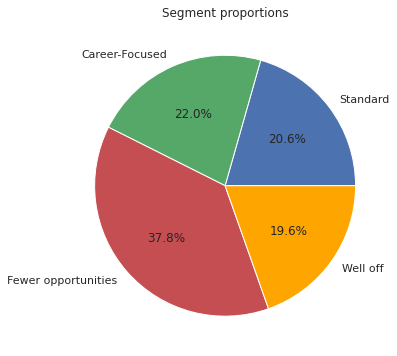

In [22]:
# Pie chart

plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
        labels=['Standard','Career-Focused','Fewer opportunities','Well off'],
        autopct='%1.1f%%',
        colors=('b','g','r','orange'))
plt.title('Segment proportions')

## **Purchase Occasion and Purchase Incidence**

Determine a quantitative measure to describe the purchase behaviour by segments.

Calculate mean and standard deviation by segments. The mean shows the average behaviour of each segment and the standard deviation shows how homogenous each segment is.

In [23]:
segments_mean=df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,117.699029,24.902913,21.277313
1.0,123.454545,39.827273,28.310171
2.0,113.730159,22.756614,20.158818
3.0,117.295918,34.602041,28.447797


In [24]:
segments_std=df_purchase_descr.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,19.039605,16.774464,12.660304
1.0,44.864656,53.744530,20.005613
2.0,16.410498,13.815040,12.033471
3.0,20.716152,25.900579,17.178714


**How often do people from different segments visit the store?**

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

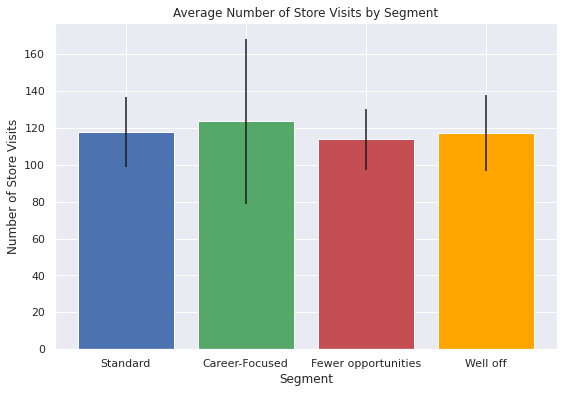

In [25]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3), # 4 bars for x
        tick_label=('Standard','Career-Focused','Fewer opportunities','Well off'), # Labels
        height=segments_mean['N_Visits'], # Y axis
        yerr=segments_std['N_Visits'], # Y error -> standard deviation
        color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

**How often a client buys a product.**

Text(0.5, 1.0, 'Number of Purchase Incidences')

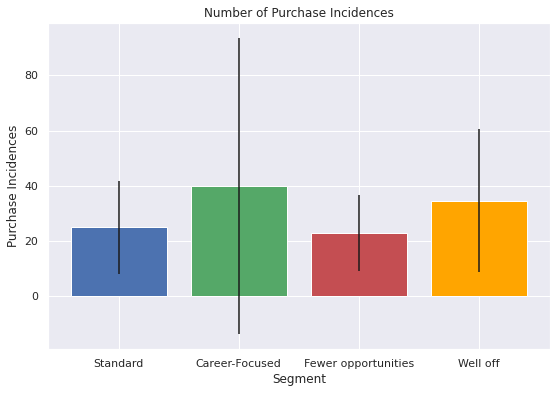

In [26]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3), # 4 bars for x
        tick_label=('Standard','Career-Focused','Fewer opportunities','Well off'), # Labels
        height=segments_mean['N_Purchases'], # Y axis
        yerr=segments_std['N_Purchases'], # Y error -> standard deviation
        color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchase Incidences')

**Average number of purchases by segment.**

Text(0.5, 1.0, 'Average number of purchases by segment')

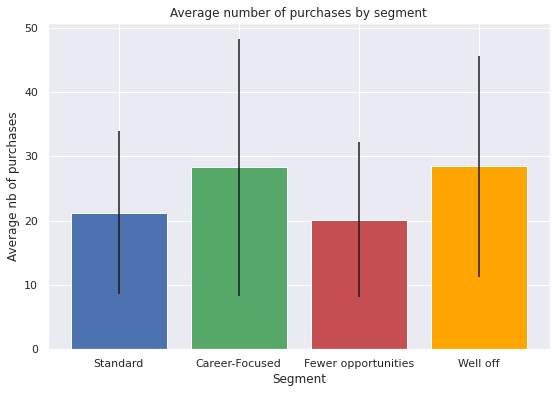

In [27]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3), # 4 bars for x
        tick_label=('Standard','Career-Focused','Fewer opportunities','Well off'), # Labels
        height=segments_mean['Average_N_Purchases'], # Y axis
        yerr=segments_std['Average_N_Purchases'], # Y error -> standard deviation
        color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Average nb of purchases')
plt.title('Average number of purchases by segment')

## **Brand choice**

In [28]:
# df_purchase_predictors contains the segment info.
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]

Create dummy variables for the 5 brands, in order for each of them to have their own column.

In [29]:
# Set the prefix to 'Brand' and use _ as a separator
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')

# Set the 2 columns (Segment, ID) from the brand_dummies dataset to their counterparts from purchase_incidence.
brand_dummies['Segment'],brand_dummies['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [30]:
# Declare a temporary variable storing the grouping by ID and taking the brand mean.
# If we set ID as an index, we'll be left with the average brand choice by customer.

temp=brand_dummies.groupby(['ID'],as_index=True).mean()

In [31]:
# Average brand choice by segment
mean_brand_choice=temp.groupby(['Segment'], as_index=True).mean()

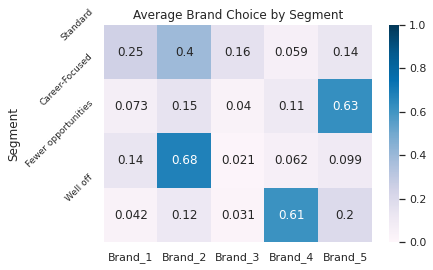

In [32]:
# Brand choice by segments

sns.heatmap(mean_brand_choice,
            vmin=0,
            vmax=1,
            cmap='PuBu',
            annot=True)
plt.yticks([0,1,2,3],['Standard','Career-Focused','Fewer opportunities','Well off'], rotation=45, fontsize=9)
plt.title('Average Brand Choice by Segment')
plt.show()

## **Revenue Analysis**

**Calculate revenues for Brand 1**

In [33]:
# Purchases for brand 1
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]

# Create a column representing Revenue for Brand 1
temp.loc[:,'Revenue Brand 1']=temp['Price_1']*temp['Quantity']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Create a new dataset with info related to revenue.

In [34]:
segments_brand_revenue=pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


Calculate the revenues for the next brands and append it to the new dataset.

Revenues for Brand 2

In [35]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==2]

temp.loc[:,'Revenue Brand 2']=temp['Price_2']*temp['Quantity']

segments_brand_revenue[['Segment','Revenue Brand 2']]=temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Revenues for Brand 3

In [36]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==3]

temp.loc[:,'Revenue Brand 3']=temp['Price_3']*temp['Quantity']

segments_brand_revenue[['Segment','Revenue Brand 3']]=temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()


Revenues for Brand 4

In [37]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==4]

temp.loc[:,'Revenue Brand 4']=temp['Price_4']*temp['Quantity']

segments_brand_revenue[['Segment','Revenue Brand 4']]=temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()


Revenues for Brand 5

In [38]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==5]

temp.loc[:,'Revenue Brand 5']=temp['Price_5']*temp['Quantity']

segments_brand_revenue[['Segment','Revenue Brand 5']]=temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()


Calculate the entire revenue by segment.

In [39]:
# Create a new column
segments_brand_revenue['Total Revenue']=(segments_brand_revenue['Revenue Brand 1']+
                                         segments_brand_revenue['Revenue Brand 2']+
                                         segments_brand_revenue['Revenue Brand 3']+
                                         segments_brand_revenue['Revenue Brand 4']+
                                         segments_brand_revenue['Revenue Brand 5']
                                         )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


Add the proportion of each segment from the Segment proportion dataframe.

In [40]:
# Append Segment proportion info from the segment proportion dataframe.
segments_brand_revenue['Segment Proportions']=segm_prop['Segment Proportions']

# Map the segments with descriptive labels.
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map({0:'Standard',
                                                                         1:'Career-Focused',
                                                                         2:'Fewer opportunities',
                                                                         3:'Well off'})

# Set the segment as the index                                                                         
segments_brand_revenue=segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


# **Modeling Purchase Incidence**

**Will a customer buy a product or not?**



The necessary scaling, pca, kmeans, standardization, segmentation steps are already done above.

In [41]:
# Create a clone dataset of the df_purchase_predictors
df_pa=df_purchase_predictors

## **Purchase Probability Model - Logistic Regression**

In [42]:
Y=df_pa['Incidence']

In [43]:
# Create a variable representing the price, irrespective of the brand.
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1']+
                 df_pa['Price_2']+
                 df_pa['Price_3']+
                 df_pa['Price_4']+
                 df_pa['Price_5']
                 )/5

In [44]:
model_purchase=LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

**This model quantifies the exact relationship between price and purchase probability.**

In [45]:
model_purchase.coef_

array([[-2.34759113]])

## **Price Elasticity of Purchase Probability**

The data will be representative of the average customer.

We'll analyze the  prices variables.

In [46]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


We'll analyze a range of prices, let's set the range between 0.5 (lower than min) and 3.5 (higher than max).

In [47]:
price_range=np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [48]:
# Assign the price range to a new dataset.
df_price_range=pd.DataFrame(price_range)

Predict the probability of purchase for each price

In [49]:
Y_pred=model_purchase.predict_proba(df_price_range)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [50]:
# The array has a row for each price value. The first value represents the probability of no purchase, and the second, the probability of purchase.
Y_pred

array([[0.08212475, 0.91787525],
       [0.08391182, 0.91608818],
       [0.08573415, 0.91426585],
       [0.08759226, 0.91240774],
       [0.08948671, 0.91051329],
       [0.09141802, 0.90858198],
       [0.09338674, 0.90661326],
       [0.09539341, 0.90460659],
       [0.09743856, 0.90256144],
       [0.09952273, 0.90047727],
       [0.10164646, 0.89835354],
       [0.10381029, 0.89618971],
       [0.10601474, 0.89398526],
       [0.10826035, 0.89173965],
       [0.11054765, 0.88945235],
       [0.11287715, 0.88712285],
       [0.11524939, 0.88475061],
       [0.11766486, 0.88233514],
       [0.12012408, 0.87987592],
       [0.12262757, 0.87737243],
       [0.1251758 , 0.8748242 ],
       [0.12776927, 0.87223073],
       [0.13040847, 0.86959153],
       [0.13309386, 0.86690614],
       [0.13582592, 0.86417408],
       [0.13860509, 0.86139491],
       [0.14143182, 0.85856818],
       [0.14430654, 0.85569346],
       [0.14722967, 0.85277033],
       [0.15020162, 0.84979838],
       [0.

Store the probability of purchase (second value from above probability array)

In [51]:
# Purchase probability
purchase_pr=Y_pred[:][:,1]

Purchase probability elasticity = (delta purchase probability /purchase probability)/(delta price/price)

=(delta purchase probability/delta price) * (Price/Purchase probability)

E= beta * price * (1-purchase probability)

beta-> coefficient from the model

In [52]:
# Create a price elasticity variable
# =price coef from the model (array with shape 1, number of features) * price_range * (1-purchase_pr)

pe=model_purchase.coef_[:,0] * price_range * (1-purchase_pr)

In [53]:
df_price_elasticities=pd.DataFrame(price_range)

In [54]:
df_price_elasticities=df_price_elasticities.rename(columns={0: 'Price_Point'})
df_price_elasticities['Mean_PE']=pe
df_price_elasticities.head()

,Price_Point,Mean_PE
0,0.50,-0.096398
1,0.51,-0.100465
2,0.52,-0.104660
3,0.53,-0.108984
4,0.54,-0.113442


In [55]:
pd.options.display.max_rows=None
df_price_elasticities.head(20)

,Price_Point,Mean_PE
0,0.50,-0.096398
1,0.51,-0.100465
2,0.52,-0.104660
3,0.53,-0.108984
4,0.54,-0.113442
5,0.55,-0.118037
6,0.56,-0.122771
7,0.57,-0.127648
8,0.58,-0.132673
9,0.59,-0.137847


Text(0.5, 1.0, 'Price elasticity of purchase probability')

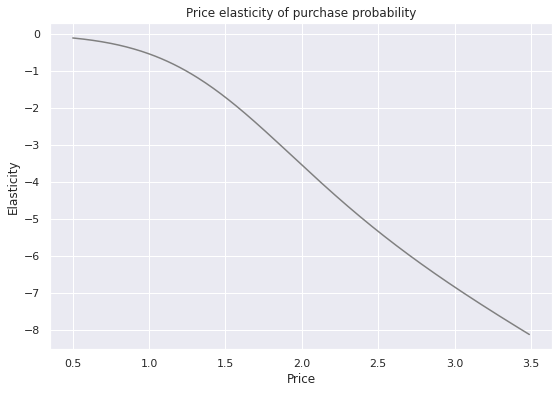

In [56]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

For inelastic (less than 1) values we increase price.

For elastic values, we decrease price. 

## **Purchase Probability by Segments**

**Segment 0**

In [57]:
df_pa_segment_0=df_pa[df_pa['Segment']==0]
Y0=df_pa_segment_0['Incidence']
X0=pd.DataFrame()
X0['Mean_Price']=(df_pa_segment_0['Price_1']+
                  df_pa_segment_0['Price_2']+
                  df_pa_segment_0['Price_3']+
                  df_pa_segment_0['Price_4']+
                  df_pa_segment_0['Price_5']
                  )/5

model_incidence_segment_0=LogisticRegression(solver='sag')
model_incidence_segment_0.fit(X0,Y0)

model_incidence_segment_0.coef_

Y_segment_0=model_incidence_segment_0.predict_proba(df_price_range)
purchase_pr_segment_0=Y_segment_0[:][:,1]
pe_segment_0=model_incidence_segment_0.coef_[:,0]*price_range*(1-purchase_pr_segment_0)

df_price_elasticities['PE_Segment_0']=pe_segment_0
df_price_elasticities.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Price_Point,Mean_PE,PE_Segment_0
0,0.50,-0.096398,-0.211139
1,0.51,-0.100465,-0.217709
2,0.52,-0.104660,-0.224387
3,0.53,-0.108984,-0.231174
4,0.54,-0.113442,-0.238070
5,0.55,-0.118037,-0.245075
6,0.56,-0.122771,-0.252192
7,0.57,-0.127648,-0.259420
8,0.58,-0.132673,-0.266761
9,0.59,-0.137847,-0.274214


Text(0.5, 1.0, 'Price elasticity of purchase probability')

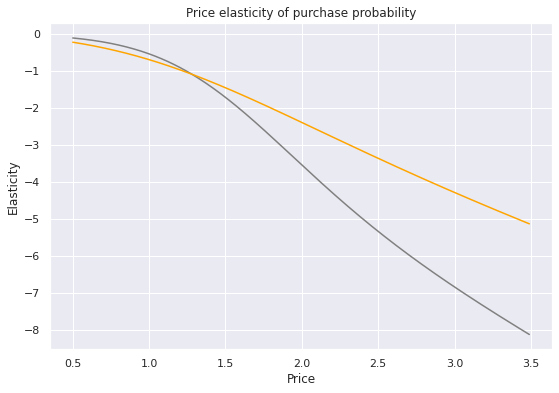

In [58]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_0,color='orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

**Segment 1: Career - Focused**

In [59]:
df_pa_segment_1=df_pa[df_pa['Segment']==1]

In [60]:
Y1=df_pa_segment_1['Incidence']

In [61]:
X1=pd.DataFrame()
X1['Mean_Price']=(df_pa_segment_1['Price_1']+
                  df_pa_segment_1['Price_2']+
                  df_pa_segment_1['Price_3']+
                  df_pa_segment_1['Price_4']+
                  df_pa_segment_1['Price_5']
                  )/5

In [62]:
model_incidence_segment_1=LogisticRegression(solver='sag')
model_incidence_segment_1.fit(X1,Y1)

LogisticRegression(solver='sag')

In [63]:
model_incidence_segment_1.coef_

array([[-1.71151284]])

In [64]:
Y_segment_1=model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1=Y_segment_1[:][:,1]
pe_segment_1=model_incidence_segment_1.coef_[:,0]*price_range*(1-purchase_pr_segment_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [65]:
df_price_elasticities['PE_Segment_1']=pe_segment_1
df_price_elasticities.head(20)

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1
0,0.50,-0.096398,-0.211139,-0.119133
1,0.51,-0.100465,-0.217709,-0.123317
2,0.52,-0.104660,-0.224387,-0.127595
3,0.53,-0.108984,-0.231174,-0.131967
4,0.54,-0.113442,-0.238070,-0.136435
5,0.55,-0.118037,-0.245075,-0.141001
6,0.56,-0.122771,-0.252192,-0.145666
7,0.57,-0.127648,-0.259420,-0.150432
8,0.58,-0.132673,-0.266761,-0.155301
9,0.59,-0.137847,-0.274214,-0.160272


Text(0.5, 1.0, 'Price elasticity of purchase probability')

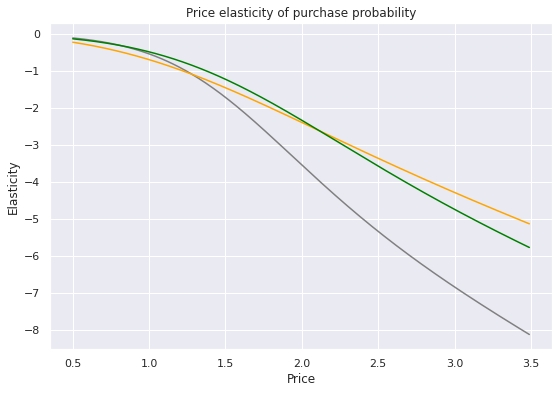

In [66]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_0,color='orange')
plt.plot(price_range,pe_segment_1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

**Segment 2 - Fewer opportunities**

In [67]:
df_pa_segment_2=df_pa[df_pa['Segment']==2]
Y2=df_pa_segment_2['Incidence']
X2=pd.DataFrame()
X2['Mean_Price']=(df_pa_segment_2['Price_1']+
                  df_pa_segment_2['Price_2']+
                  df_pa_segment_2['Price_3']+
                  df_pa_segment_2['Price_4']+
                  df_pa_segment_2['Price_5']
                  )/5

model_incidence_segment_2=LogisticRegression(solver='sag')
model_incidence_segment_2.fit(X2,Y2)

model_incidence_segment_2.coef_

Y_segment_2=model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2=Y_segment_2[:][:,1]
pe_segment_2=model_incidence_segment_2.coef_[:,0]*price_range*(1-purchase_pr_segment_2)

df_price_elasticities['PE_Segment_2']=pe_segment_2
df_price_elasticities.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2
0,0.50,-0.096398,-0.211139,-0.119133,-0.030931
1,0.51,-0.100465,-0.217709,-0.123317,-0.032699
2,0.52,-0.104660,-0.224387,-0.127595,-0.034554
3,0.53,-0.108984,-0.231174,-0.131967,-0.036499
4,0.54,-0.113442,-0.238070,-0.136435,-0.038539
5,0.55,-0.118037,-0.245075,-0.141001,-0.040679
6,0.56,-0.122771,-0.252192,-0.145666,-0.042922
7,0.57,-0.127648,-0.259420,-0.150432,-0.045273
8,0.58,-0.132673,-0.266761,-0.155301,-0.047736
9,0.59,-0.137847,-0.274214,-0.160272,-0.050317


Text(0.5, 1.0, 'Price elasticity of purchase probability')

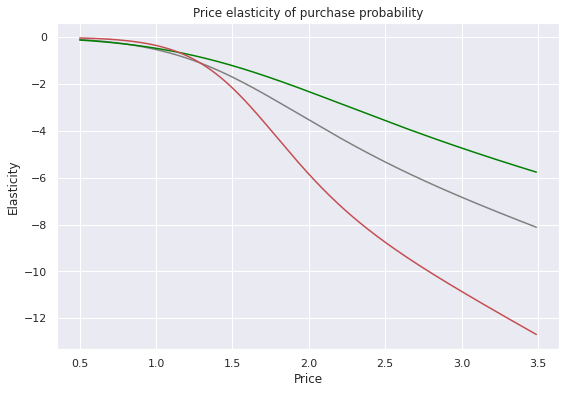

In [68]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_1,color='green')
plt.plot(price_range,pe_segment_2,color='r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

**Segment 3**

In [69]:
df_pa_segment_3=df_pa[df_pa['Segment']==3]
Y3=df_pa_segment_3['Incidence']
X3=pd.DataFrame()
X3['Mean_Price']=(df_pa_segment_3['Price_1']+
                  df_pa_segment_3['Price_2']+
                  df_pa_segment_3['Price_3']+
                  df_pa_segment_3['Price_4']+
                  df_pa_segment_3['Price_5']
                  )/5

model_incidence_segment_3=LogisticRegression(solver='sag')
model_incidence_segment_3.fit(X3,Y3)

model_incidence_segment_3.coef_

Y_segment_3=model_incidence_segment_3.predict_proba(df_price_range)
purchase_pr_segment_3=Y_segment_3[:][:,1]
pe_segment_3=model_incidence_segment_3.coef_[:,0]*price_range*(1-purchase_pr_segment_3)

df_price_elasticities['PE_Segment_3']=pe_segment_3
df_price_elasticities.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096398,-0.211139,-0.119133,-0.030931,-0.168052
1,0.51,-0.100465,-0.217709,-0.123317,-0.032699,-0.172977
2,0.52,-0.104660,-0.224387,-0.127595,-0.034554,-0.177972
3,0.53,-0.108984,-0.231174,-0.131967,-0.036499,-0.183038
4,0.54,-0.113442,-0.238070,-0.136435,-0.038539,-0.188175
5,0.55,-0.118037,-0.245075,-0.141001,-0.040679,-0.193385
6,0.56,-0.122771,-0.252192,-0.145666,-0.042922,-0.198666
7,0.57,-0.127648,-0.259420,-0.150432,-0.045273,-0.204020
8,0.58,-0.132673,-0.266761,-0.155301,-0.047736,-0.209448
9,0.59,-0.137847,-0.274214,-0.160272,-0.050317,-0.214949


Text(0.5, 1.0, 'Price elasticity of purchase probability')

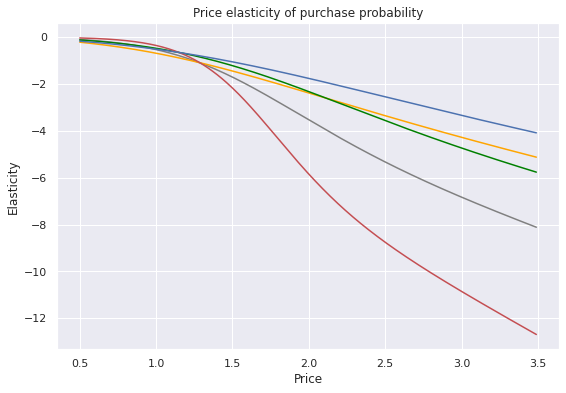

In [70]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_0,color='orange')
plt.plot(price_range,pe_segment_1,color='green')
plt.plot(price_range,pe_segment_2,color='r')
plt.plot(price_range,pe_segment_3,color='b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

## **Purchase Probability with Promotion Feature**

In [71]:
Y_promo=df_pa['Incidence']
X_promo=pd.DataFrame()

# Average price
X_promo['Mean_Price']=(df_pa['Price_1']+
                       df_pa['Price_2']+
                       df_pa['Price_3']+
                       df_pa['Price_4']+
                       df_pa['Price_5']
                       )/5

In [72]:
# Average promotional activity accross all brands.
X_promo['Mean_Promotion']=(df_pa['Promotion_1']+
                       df_pa['Promotion_2']+
                       df_pa['Promotion_3']+
                       df_pa['Promotion_4']+
                       df_pa['Promotion_5']
                       )/5

In [73]:
X_promo.head(20)

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
5,2.028,0.0
6,2.030,0.0
7,2.030,0.0
8,1.932,0.6
9,1.932,0.6


**Model Estimation**

In [74]:
model_incidence_promotion=LogisticRegression(solver='sag')
model_incidence_promotion.fit(X_promo,Y_promo)

# There will be 2 coefficients, one for price, one for promotion
model_incidence_promotion.coef_

array([[-1.49396425,  0.56157732]])

The model will quantify the relationship between price, promotion and purchase probability.

**Price Elasticity with Promotion**

In [75]:
df_price_elasticity_promotion=pd.DataFrame(price_range)
df_price_elasticity_promotion=df_price_elasticity_promotion.rename(columns={0:'Price_Range'})

Case 1: promotional activities accross all brands

Case 2: no promotional activities 

**Case 1: promotional activities accross all brands**

In [76]:
df_price_elasticity_promotion['Promotion']=1

In [77]:
Y_promotion=model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [78]:
promo=Y_promotion[:,1]
price_elasticity_promo=(model_incidence_promotion.coef_[:,0] * price_range) * (1-promo)

In [79]:
df_price_elasticities['Elasticity_Promotion_1']=price_elasticity_promo
df_price_elasticities.head(20)

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096398,-0.211139,-0.119133,-0.030931,-0.168052,-0.125729
1,0.51,-0.100465,-0.217709,-0.123317,-0.032699,-0.172977,-0.129845
2,0.52,-0.104660,-0.224387,-0.127595,-0.034554,-0.177972,-0.134040
3,0.53,-0.108984,-0.231174,-0.131967,-0.036499,-0.183038,-0.138315
4,0.54,-0.113442,-0.238070,-0.136435,-0.038539,-0.188175,-0.142671
5,0.55,-0.118037,-0.245075,-0.141001,-0.040679,-0.193385,-0.147108
6,0.56,-0.122771,-0.252192,-0.145666,-0.042922,-0.198666,-0.151629
7,0.57,-0.127648,-0.259420,-0.150432,-0.045273,-0.204020,-0.156233
8,0.58,-0.132673,-0.266761,-0.155301,-0.047736,-0.209448,-0.160923
9,0.59,-0.137847,-0.274214,-0.160272,-0.050317,-0.214949,-0.165698


**Case 2: no promotional activities**

In [80]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [81]:
# We analyze the elasticity of purchase probability when there isn't promotion.
df_price_elasticity_promotion_no['Promotion'] = 0

In [82]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [83]:
no_promo = Y_no_promo[: , 1]

In [84]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [85]:
# Update data frame to include purchase probability elasticities without promotion.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Compare purchase elasticities with and without promotion.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with (green) and without (blue) Promotion')

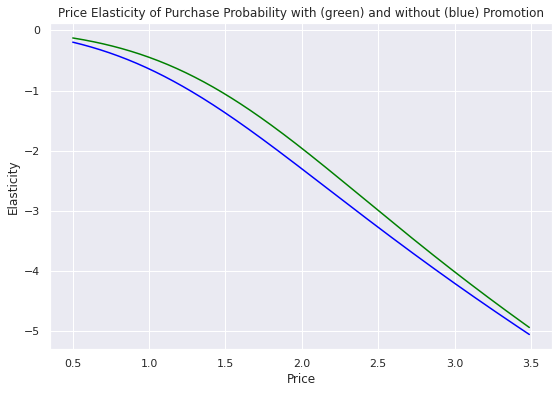

In [86]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo, color='blue')
plt.plot(price_range, price_elasticity_promo, color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with (green) and without (blue) Promotion')

# **Brand Choice Modelling using Multinomial Regression**

Scope: obtain the probability of choosing a certain brand.

### **Data preparation**

In [87]:
# Select data where a purchase has been made.

brand_choice=df_pa[df_pa['Incidence']==1]

In [88]:
brand_choice.head(20)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2
52,200000001,327,1,4,3,0,0,1.47,1.89,2.01,...,1,0,0,0,47,1,110866,1,0,2
79,200000001,547,1,2,2,0,0,1.35,1.89,2.07,...,0,0,0,0,47,1,110866,1,0,2
80,200000001,562,1,2,3,2,1,1.33,1.51,2.07,...,0,0,0,0,47,1,110866,1,0,2
97,200000001,702,1,5,1,0,0,1.41,1.85,2.00,...,0,0,0,0,47,1,110866,1,0,2
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,0,0,1,1,52,2,159052,2,1,3


In [89]:
Y=brand_choice['Brand']

In [90]:
# See columns
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment'],
      dtype=object)

In [91]:
# We will consider that prices have the biggest impact.
features=['Price_1','Price_2','Price_3','Price_4','Price_5']
X=brand_choice[features]

In [92]:
# Initiate the model

model_brand_choice=LogisticRegression(solver='sag', multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [93]:
# Extract coefficients

model_brand_choice.coef_

array([[-3.91596326,  0.6584579 ,  2.41769653,  0.70408211, -0.20211634],
       [ 1.27460841, -1.87985684, -0.2126624 , -0.20634265,  0.58786555],
       [ 1.62420687,  0.56211712,  0.50096257,  1.03951616,  0.45281027],
       [ 0.57453194,  0.3955855 , -1.40062937, -1.24624607,  0.24934445],
       [ 0.44261604,  0.26369632, -1.30536732, -0.29100955, -1.08790393]])

In [94]:
# Create a dataframe 
bc_coef=pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915963,0.658458,2.417697,0.704082,-0.202116
1,1.274608,-1.879857,-0.212662,-0.206343,0.587866
2,1.624207,0.562117,0.500963,1.039516,0.452810
3,0.574532,0.395585,-1.400629,-1.246246,0.249344
4,0.442616,0.263696,-1.305367,-0.291010,-1.087904


In [95]:
# Transpose the dataset
bc_coef=pd.DataFrame(np.transpose(model_brand_choice.coef_))

# Set the header names
coefficients=['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns=[coefficients]

# Set the index labels
prices=['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index=[prices]

# Round values to 2 decimals.
bc_coef=bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


### **Own Price Elasticity Brand 5**

In [96]:
# Generate a dataframe

df_own_brand_5=pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5['Price_5']=price_range

df_own_brand_5.head(20)

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
5,1.384559,1.764717,2.006694,2.159658,0.55
6,1.384559,1.764717,2.006694,2.159658,0.56
7,1.384559,1.764717,2.006694,2.159658,0.57
8,1.384559,1.764717,2.006694,2.159658,0.58
9,1.384559,1.764717,2.006694,2.159658,0.59


In [97]:
# Predicted probabilities
predict_brand_5=model_brand_choice.predict_proba(df_own_brand_5)

In [98]:
# Probability of choosing our own brand
pr_own_brand_5=predict_brand_5[:][:,4]

In [99]:
# Retrive and assign the beta price coefficient.
beta5=bc_coef.iloc[4,4]
beta5

-1.09

In [100]:
own_price_elasticity_brand_5=beta5*price_range*(1-pr_own_brand_5)

In [101]:
df_price_elasticities['Brand_5']=own_price_elasticity_brand_5
df_price_elasticities.head(20)

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096398,-0.211139,-0.119133,-0.030931,-0.168052,-0.125729,-0.195647,-0.049055
1,0.51,-0.100465,-0.217709,-0.123317,-0.032699,-0.172977,-0.129845,-0.201768,-0.050616
2,0.52,-0.104660,-0.224387,-0.127595,-0.034554,-0.177972,-0.134040,-0.207992,-0.052207
3,0.53,-0.108984,-0.231174,-0.131967,-0.036499,-0.183038,-0.138315,-0.214319,-0.053827
4,0.54,-0.113442,-0.238070,-0.136435,-0.038539,-0.188175,-0.142671,-0.220750,-0.055477
5,0.55,-0.118037,-0.245075,-0.141001,-0.040679,-0.193385,-0.147108,-0.227286,-0.057158
6,0.56,-0.122771,-0.252192,-0.145666,-0.042922,-0.198666,-0.151629,-0.233928,-0.058871
7,0.57,-0.127648,-0.259420,-0.150432,-0.045273,-0.204020,-0.156233,-0.240676,-0.060615
8,0.58,-0.132673,-0.266761,-0.155301,-0.047736,-0.209448,-0.160923,-0.247532,-0.062391
9,0.59,-0.137847,-0.274214,-0.160272,-0.050317,-0.214949,-0.165698,-0.254495,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

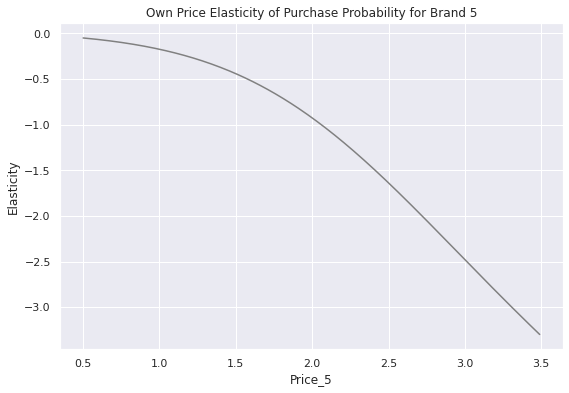

In [102]:
# Visualize data

plt.figure(figsize=(9,6))
plt.plot(price_range, own_price_elasticity_brand_5, color='grey')
plt.xlabel('Price_5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

### **Cross Price Elasticity - Brand 5 with respects to Brand 4**

In [103]:
# Generate a new dataset. We need to see the price changes in the price of brand 4, so for the other brands, we'll take mean prices.
df_brand5_cross_brand4=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4['Price_1']=brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2']=brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3']=brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4']=price_range
df_brand5_cross_brand4['Price_5']=brand_choice['Price_5'].mean()

In [104]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [105]:
# Compute the probabilities
predict_brand5_cross_brand4=model_brand_choice.predict_proba(df_brand5_cross_brand4)

**Cross price elasticity**
=-beta(own price) * price(cross brand) * probability of choosing (cross brand)

In [106]:
# Probabilities for brand 4
pr_brand_4=predict_brand5_cross_brand4[:][:, 3]

In [107]:
beta5

-1.09

In [108]:
brand5_cross_brand4_price_elasticity=-beta5*price_range*pr_brand_4

In [109]:
df_price_elasticities['Brand_5_Cross_Brand_4']=brand5_cross_brand4_price_elasticity
df_price_elasticities.head(20)

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096398,-0.211139,-0.119133,-0.030931,-0.168052,-0.125729,-0.195647,-0.049055,0.332012
1,0.51,-0.100465,-0.217709,-0.123317,-0.032699,-0.172977,-0.129845,-0.201768,-0.050616,0.337288
2,0.52,-0.104660,-0.224387,-0.127595,-0.034554,-0.177972,-0.134040,-0.207992,-0.052207,0.342507
3,0.53,-0.108984,-0.231174,-0.131967,-0.036499,-0.183038,-0.138315,-0.214319,-0.053827,0.347669
4,0.54,-0.113442,-0.238070,-0.136435,-0.038539,-0.188175,-0.142671,-0.220750,-0.055477,0.352773
5,0.55,-0.118037,-0.245075,-0.141001,-0.040679,-0.193385,-0.147108,-0.227286,-0.057158,0.357820
6,0.56,-0.122771,-0.252192,-0.145666,-0.042922,-0.198666,-0.151629,-0.233928,-0.058871,0.362809
7,0.57,-0.127648,-0.259420,-0.150432,-0.045273,-0.204020,-0.156233,-0.240676,-0.060615,0.367741
8,0.58,-0.132673,-0.266761,-0.155301,-0.047736,-0.209448,-0.160923,-0.247532,-0.062391,0.372614
9,0.59,-0.137847,-0.274214,-0.160272,-0.050317,-0.214949,-0.165698,-0.254495,-0.064200,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 with respects to Brand 4')

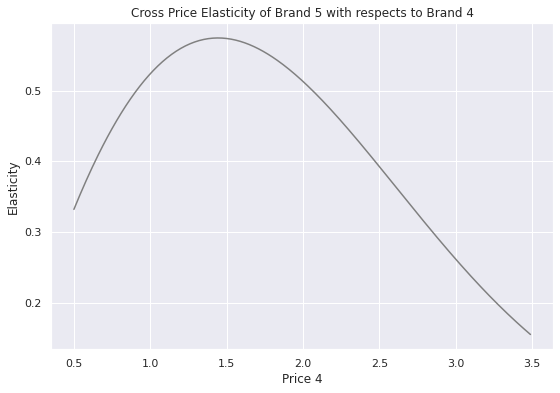

In [110]:
# Visualize results

plt.figure(figsize=(9,6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color='grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 with respects to Brand 4')

The elasticities are positive accross the price ranges, meaning if the competitor 4 increases prices, the probability of choosing our product would increase. The model shows exact relationship across price ranges.

General considerations:

E(cross brand)>0 => Product are substitutes

|E(cross brand)| > |E (own brand)| => The alternative brand is a strong substitute